### Drehfreudig [Bwinf44 2025](https://bwinf.de/bundeswettbewerb/44/) - A1

[Video](https://youtu.be/M9Z4fPFFBkM)

<img src='bild1.png' width='251'>
<img src='bild2a.png' width='251'>
<img src='bild2.png' width='251'>


#### Was bedeutet drehfreudig?

Laut Lösungshinweise ist der abgebildete Baum (Beispiel 06) drehfreudig. Ich hätte ihn nach der Aufgabenstellung als nicht drehfreudig klassifiziert.
Der Baum wird laut Aufgabenstellung mit einem großen Rechteck identifiziert. Der obere Baum hat die blaue Linie als untere Rechteckkante. Drehfreudig ist ein Baum dann, wenn sich die Blätter in der Mitte passgenau treffen. Das interpretiere ich so, dass die Rechtecke der Blätter übereinander gelegt werden können. Dadurch ist klar, dass ein Baum, dessen Blätter Rechtecke mit unterschiedlichen Höhen haben, nicht drehfreudig sein kann.

Für die Lösung der Aufgabe sind beide Interpretationen zulässig.  

<img src='bild4.png' width='500'>

Der folgende Baum ist nach meinem Verständnis drehfreudig. Die Zahlen kann man als Breite oder Wahrscheinlichkeit interpretieren.
Bei den Blättern steht die Wahrscheinlichkeit, zu ihnen zu kommen (= ihre Breite).

Dazu müssen 2 Dinge überprüft werden:

- alle Blätter sind auf der gleichen Ebene
- die grünen Zahlen bei den Blättern bilden ein Palindrom (d.h. rückwärts gelesen ist es dieselbe Abfolge)


<img src='bild5.png' width='601'>

#### Beispieldaten

Jede Datei enthält eine Baumstruktur bestehend aus öffnenden und schließenden Klammern, wie auf dem Aufgabenblatt erläutert.
Hier eine Bespieleingabe:

    (()())

In diesem Beispiel besteht der Baum aus einem Wurzelknoten mit zwei Kindknoten.
Würde man die Knoten zum besseren Verständnis benennen, dann würde diese Baumstruktur in Klammer-Notation

    (A(B(D)(E(H)(I)))(C(F(J)(K))(G)))

aussehen, wie in diesem Bild dargestellt:

<img src='bild3.png' width='500'>

In [ ]:
# Anschauen der Beispieldaten 01-15
nr = '02'
print(f'Beispiel {nr}:')
f = open(f'beispieldaten/drehfreudig{nr}.txt', encoding='utf-8')
print(f.read().strip())
f.close()

#### Umsetzen des Klammerstrings in einen Baum

<img src='bild6.png' width='700'>

In [ ]:
def klammernToGraph(s):
    G = {x:[] for x in range(1,len(s)//2 + 1)}         
    stack = []      
    zaehl = 0      
    for c in s:
        if c == '(':
            zaehl += 1
            if stack:     # wenn nicht die Wurzel betrachtet wird
                parent = stack[-1]              
                G[parent].append(zaehl)
            stack.append(zaehl)
        elif c == ')':
            stack.pop()
    return G

In [35]:
nr = '04'
print(f'Beispiel {nr}:')
f = open(f'beispieldaten/drehfreudig{nr}.txt', encoding='utf-8')
s = f.read().strip()
f.close()
G = klammernToGraph(s)
G

Beispiel 04:


{1: [2, 6],
 2: [3, 4, 5],
 3: [],
 4: [],
 5: [],
 6: [7, 8, 9],
 7: [],
 8: [],
 9: []}

Wir gehen mit einer rekursiven Tiefensuche (dfs) durch den Baum und merken uns die für uns wichtigen Sachen:

    - die Breite jedes Knotens
    - den Level jedes Knotens
    - welche Knoten sind Blätter?

In [36]:
breite = {v:0 for v in G}
level = {v:0 for v in G}
blaetter = []
def dfs(v,lev):
    level[v] = lev
    if len(G[v]) == 0:
        blaetter.append(v)
    for u in G[v]:
        breite[u] = breite[v]/len(G[v])
        dfs(u,lev+1)

breite[1] = 1
dfs(1,1)

In [37]:
breite

{1: 1,
 2: 0.5,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.5,
 7: 0.16666666666666666,
 8: 0.16666666666666666,
 9: 0.16666666666666666}

In [38]:
level

{1: 1, 2: 2, 3: 3, 4: 3, 5: 3, 6: 2, 7: 3, 8: 3, 9: 3}

In [39]:
blaetter

[3, 4, 5, 7, 8, 9]

In [40]:
blattlevel = [level[v] for v in blaetter]
blattbreiten = [breite[v] for v in blaetter]

if len(set(blattlevel)) == 1 and blattbreiten == blattbreiten[::-1]:
    print('Der Baum ist drehfreudig.')
    print(f'Alle Blätter haben die Tiefe {blattlevel[0]}.')
    print(f'Die Folge der Blätterbreiten ist ein Palindrom.')
    for x in blattbreiten:
        print(x)
else:
    print('Der Baum ist nicht drehfreudig.')
    if len(set(blattlevel)) != 1:
        print('Die Blätter haben nicht alle die gleiche Tiefe:')
        print(blattlevel)
    else:
        print(f'Die Folge der Blätterbreiten ist kein Palindrom.')
        for x in blattbreiten:
            print(x)
        

Der Baum ist drehfreudig.
Alle Blätter haben die Tiefe 3.
Die Folge der Blätterbreiten ist ein Palindrom.
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666


#### Das ganze Programm

In [41]:
def klammernToGraph(s):
    G = {x:[] for x in range(1,len(s)//2 + 1)}         
    stack = []      
    zaehl = 0      
    for c in s:
        if c == '(':
            zaehl += 1
            if stack:     # wenn nicht die Wurzel betrachtet wird
                parent = stack[-1]              
                G[parent].append(zaehl)
            stack.append(zaehl)
        elif c == ')':
            stack.pop()
    return G

nr = '02'
print(f'Beispiel {nr}:')
f = open(f'beispieldaten/drehfreudig{nr}.txt', encoding='utf-8')
s = f.read().strip()
f.close()

G = klammernToGraph(s)

breite = {v:0 for v in G}
level = {v:0 for v in G}
blaetter = []
def dfs(v,lev):
    level[v] = lev
    if len(G[v]) == 0:
        blaetter.append(v)
    for u in G[v]:
        breite[u] = breite[v]/len(G[v])
        dfs(u,lev+1)

breite[1] = 1
dfs(1,1)

blattlevel = [level[v] for v in blaetter]
blattbreiten = [breite[v] for v in blaetter]

if len(set(blattlevel)) == 1 and blattbreiten == blattbreiten[::-1]:
    print('Der Baum ist drehfreudig.')
    print(f'Alle Blätter haben die Tiefe {blattlevel[0]}.')
    print(f'Die Folge der Blätterbreiten ist ein Palindrom.')
    for x in blattbreiten:
        print(x)
else:
    print('Der Baum ist nicht drehfreudig.')
    if len(set(blattlevel)) != 1:
        print('Die Blätter haben nicht alle die gleiche Tiefe:')
        print(blattlevel)
    else:
        print(f'Die Folge der Blätterbreiten ist kein Palindrom.')
        for x in blattbreiten:
            print(x)

Beispiel 02:
Der Baum ist nicht drehfreudig.
Die Folge der Blätterbreiten ist kein Palindrom.
0.25
0.25
0.16666666666666666
0.16666666666666666
0.16666666666666666


#### Visualisierung der Bäume

Mit networkx können wir Graphen und Bäume zeichnen. Den Baum G können wir als gerichteten Graph auffassen.

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

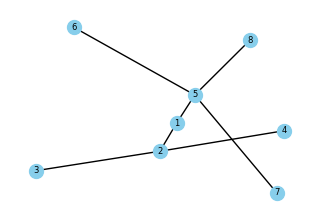

In [43]:
plt.figure(figsize=(3, 2))
G1 = nx.DiGraph(G)
np.random.seed(9)
nx.draw(
    G1,
    with_labels=True,
    node_size=100,
    node_color="skyblue",
    arrows=False,
    font_size=6
)
plt.show()

Wir gehen nochmal mit dfs durch den Baum und bestimmen die Positionen

In [44]:
pos = {u: 0 for u in G}
def dfs1(u):
    x, y = pos[u]
    for i, v in enumerate(G[u]):
        pos[v] = (x-breite[u]/2 + i*breite[v] + breite[v]/2, y-1)
        dfs1(v)
pos[1] = (0.5,0)
dfs1(1)

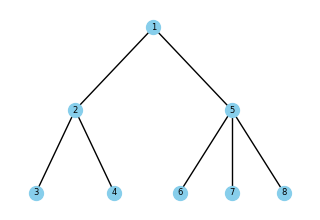

In [45]:
plt.figure(figsize=(3, 2))
G1 = nx.DiGraph(G)
nx.draw(
    G1, pos,
    with_labels=True,
    node_size=100,
    node_color="skyblue",
    arrows=False,
    font_size=6
)
plt.show()

Wir bestimmen den Mittelpunkt des Bildes und machen daran eine Punktspiegelung. Das gibt uns die Koordinaten für den um 180 Grad gedrehten Baum. 

In [46]:
xs = [x for x, y in pos.values()]
ys = [y for x, y in pos.values()]

cx = (min(xs) + max(xs)) / 2
cy = (min(ys) + max(ys)) / 2
pos_rot = {
    node: (2*cx - x, 2*cy - y)
    for node, (x, y) in pos.items()
} 

In [47]:
pos_rot

{1: (0.5416666666666665, -2.0),
 2: (0.7916666666666665, -1.0),
 3: (0.9166666666666665, 0.0),
 4: (0.6666666666666665, 0.0),
 5: (0.2916666666666665, -1.0),
 6: (0.45833333333333315, 0.0),
 7: (0.2916666666666665, 0.0),
 8: (0.12499999999999989, 0.0)}

In [57]:
max_y_rot = max([y for x,y in pos_rot.values()])
min_y     = min([y for x,y in pos.values()])
diff = max_y_rot - min_y
for k in pos_rot:
    x, y = pos_rot[k]
    pos_rot[k] = (x,y-diff-0.2)


-0.2999999999999998


In [58]:
pos_rot

{1: (0.5416666666666665, -4.2),
 2: (0.7916666666666665, -3.2),
 3: (0.9166666666666665, -2.2),
 4: (0.6666666666666665, -2.2),
 5: (0.2916666666666665, -3.2),
 6: (0.45833333333333315, -2.2),
 7: (0.2916666666666665, -2.2),
 8: (0.12499999999999989, -2.2)}

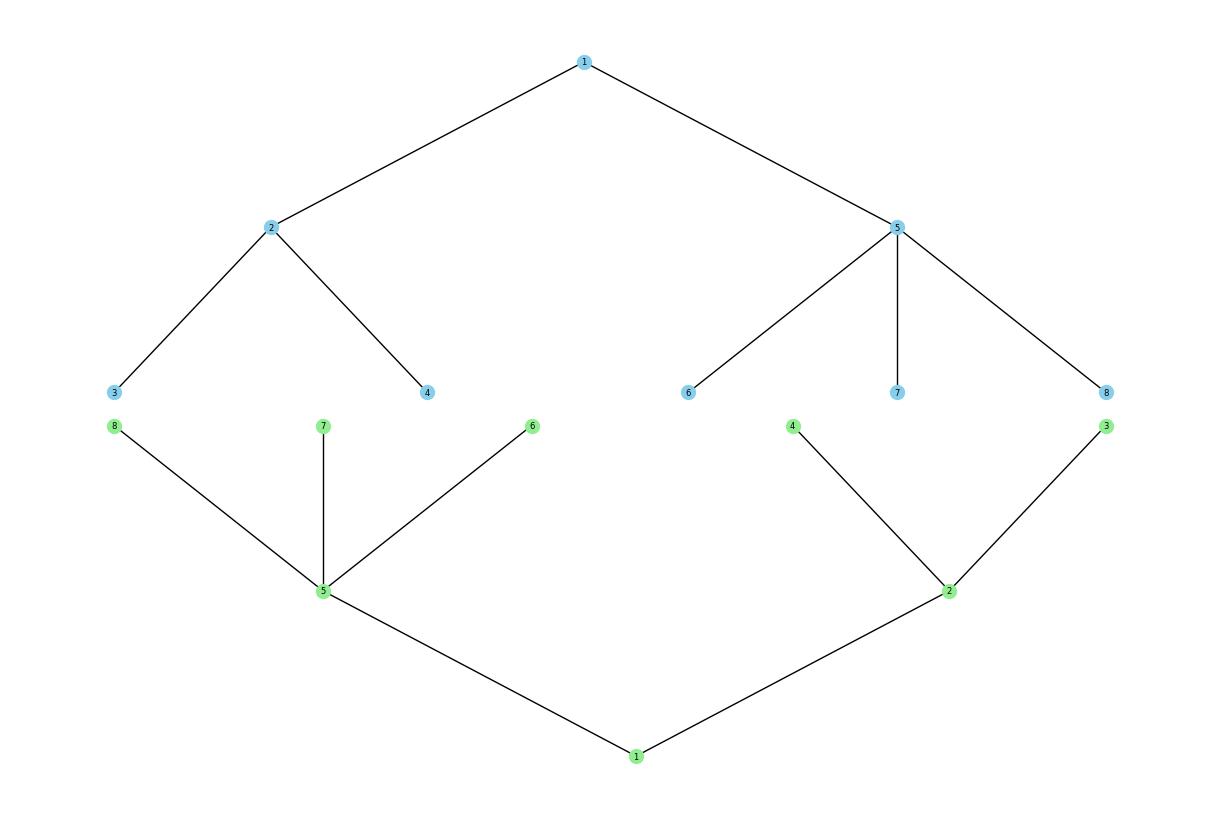

In [59]:
plt.figure(figsize=(12, 8))
# plt.subplot(2, 1, 1)
nx.draw(
    G1, pos,
    with_labels=True,
    node_size=100,
    node_color="skyblue",
    arrows=False,
    font_size=6
)
# plt.subplot(2, 1, 2)
nx.draw(
    G1, pos_rot,
    with_labels=True,
    node_size=100,
    node_color="lightgreen",
    arrows=False,
    font_size=6
)
plt.show()


#### Das ganze Programm mit Baum-Visualisierung

Beispiel 15:
Der Baum ist nicht drehfreudig.
Die Blätter haben nicht alle die gleiche Tiefe:
[3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3]


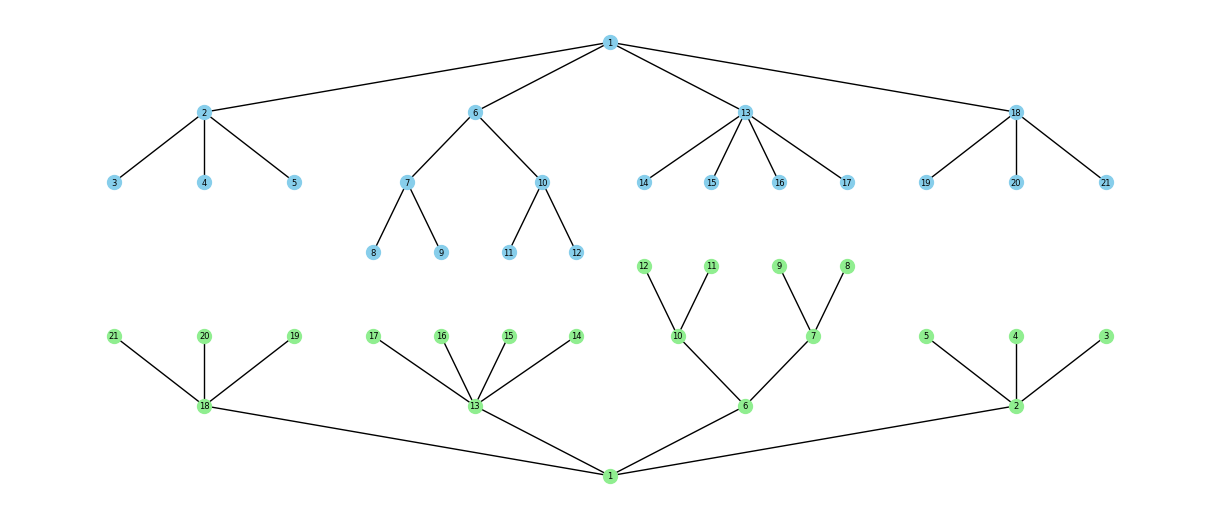

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def klammernToGraph(s):
    G = {x:[] for x in range(1,len(s)//2 + 1)}         
    stack = []      
    zaehl = 0      
    for c in s:
        if c == '(':
            zaehl += 1
            if stack:     # wenn nicht die Wurzel betrachtet wird
                parent = stack[-1]              
                G[parent].append(zaehl)
            stack.append(zaehl)
        elif c == ')':
            stack.pop()
    return G

# Einlesen der Daten
nr = '15'
print(f'Beispiel {nr}:')
f = open(f'beispieldaten/drehfreudig{nr}.txt', encoding='utf-8')
s = f.read().strip()
f.close()

# Klammerstring in Baum unwandeln
G = klammernToGraph(s)

# Berechnen von Breite und Level eines Knotens
breite = {v:0 for v in G}
level = {v:0 for v in G}
blaetter = []
def dfs(v,lev):
    level[v] = lev
    if len(G[v]) == 0:
        blaetter.append(v)
    for u in G[v]:
        breite[u] = breite[v]/len(G[v])
        dfs(u,lev+1)

breite[1] = 1
dfs(1,1)

blattlevel = [level[v] for v in blaetter]
blattbreiten = [breite[v] for v in blaetter]

# Entscheidung, ob drehfreudig 
if len(set(blattlevel)) == 1 and blattbreiten == blattbreiten[::-1]:
    print('Der Baum ist drehfreudig.')
    print(f'Alle Blätter haben die Tiefe {blattlevel[0]}.')
    print(f'Die Folge der Blätterbreiten ist ein Palindrom.')
    for x in blattbreiten:
        print(x)
else:
    print('Der Baum ist nicht drehfreudig.')
    if len(set(blattlevel)) != 1:
        print('Die Blätter haben nicht alle die gleiche Tiefe:')
        print(blattlevel)
    else:
        print(f'Die Folge der Blätterbreiten ist kein Palindrom.')
        for x in blattbreiten:
            print(x)

# Bestimmung der Position zur Visualisierung
pos = {u: 0 for u in G}
def dfs1(u):
    x, y = pos[u]
    for i, v in enumerate(G[u]):
        pos[v] = (x-breite[u]/2 + i*breite[v] + breite[v]/2, y-1)
        dfs1(v)
pos[1] = (0.5,0)
dfs1(1)

# Koordinaten des Punktes für die Punktspiegelung
cx = pos[1][0]
cy = -max(blattlevel)+1

# Punktspiegelung
pos_rot = {
    node: (2*cx - x, 2*cy - y - 0.2)   # Abstand 0.2
    for node, (x, y) in pos.items()
}

# Zeichnen der beiden Bäume
G1 = nx.DiGraph(G)
plt.figure(figsize=(12, 5))
nx.draw(
    G1, pos,
    with_labels=True,
    node_size=100,
    node_color="skyblue",
    arrows=False,
    font_size=6
)
nx.draw(
    G1, pos_rot,
    with_labels=True,
    node_size=100,
    node_color="lightgreen",
    arrows=False,
    font_size=6
)
plt.show()

In [12]:
breite

{1: 1, 2: 0.5, 3: 0.25, 4: 0.25, 5: 0.5, 6: 0.25, 7: 0.125, 8: 0.125, 9: 0.25}